<a href="https://colab.research.google.com/github/JPatoDiaz/spotify_hipotesis/blob/main/analisis_spotufy_regresi%C3%B3nlineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import data base complete

In [ ]:
import pandas as pd
from google.colab import auth
from google.cloud import bigquery
from IPython.display import display

# Autenticación con Google Cloud
auth.authenticate_user()

# Configurar el cliente de BigQuery
project_id = "canvas-landing-404517"
client = bigquery.Client(project=project_id)

# Query para obtener datos de BigQuery - Tabla complete_data_base_cuartiles
query_complete_data_base_cuartiles = """
SELECT *
FROM `AnalisisSpotify.complete_data_base_cuartiles`
"""

# Ejecutar la consulta y almacenar el resultado en un DataFrame de pandas
df_complete_data_base_cuartiles = client.query(query_complete_data_base_cuartiles).to_dataframe()

# Mostrar todo el DataFrame en formato de tabla
display(df_complete_data_base_cuartiles)

# Query para obtener datos de BigQuery - tabla artist_song_counts_streams
query_artist_song_counts_streams = """
SELECT *
FROM `AnalisisSpotify.artist_song_counts_streams`
"""

# Ejecutar la consulta y almacenar el resultado en un DataFrame de pandas
df_artist_song_counts_streams = client.query(query_artist_song_counts_streams).to_dataframe()

# Mostrar todo el DataFrame en formato de tabla
display(df_artist_song_counts_streams)

,track_id,artist_count,artist_name_clean,track_name_clean,streams_clean,date_complete,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,...,total_playlists_participation,category_streams,category_bpm,category_danceability,category_valence,category_energy,category_acousticness,category_instrumentalness,category_liveness,category_speechiness
0,7890756,1,Coldplay,The Scientist,1608164312,2002-08-05,30992,6,124,25,...,38943,alto,alto,bajo,bajo,bajo,alto,bajo,bajo,bajo
1,3253565,1,Ed Sheeran,Perfect,2559529074,2017-01-01,16596,13,7,0,...,18697,alto,bajo,bajo,bajo,bajo,bajo,bajo,bajo,bajo
2,6044216,2,Yuridia Angela Aguilar,Qu Ago,236857112,2022-10-20,660,15,19,59,...,697,bajo,bajo,bajo,alto,bajo,alto,alto,bajo,bajo
3,1404326,1,Billie Eilish,What Was I Made For From The Motion Picture ...,30546883,2023-07-13,873,104,80,227,...,1048,bajo,bajo,bajo,bajo,bajo,alto,bajo,bajo,bajo
4,4703367,1,Labrinth,I m Tired From Euphoria An Original HBO Se...,121913181,2022-02-04,1888,0,26,1,...,1972,bajo,bajo,bajo,bajo,bajo,bajo,alto,alto,bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,3476652,1,Lil Baby,California Breeze,85559365,2022-10-14,991,0,36,38,...,1040,bajo,alto,bajo,bajo,bajo,bajo,bajo,bajo,alto
940,7762851,3,Kendrick Lamar Sam Dew Baby Keem,Savior,86176890,2022-05-13,2291,0,9,0,...,2308,bajo,bajo,bajo,bajo,bajo,alto,alto,alto,alto
941,2969049,2,Kaliii Kaliii,Area Codes,113509496,2023-03-17,1197,13,44,34,...,1266,bajo,alto,alto,bajo,bajo,bajo,bajo,bajo,alto
942,3035987,2,Drake 21 Savage,On BS,170413877,2022-11-04,1338,0,9,20,...,1354,bajo,alto,alto,bajo,bajo,bajo,bajo,alto,alto


,artist_name_clean,total_canciones,total_streams
0,Vundabar,1,370068639
1,Kenia OS,1,156214700
2,SALES,1,156658366
3,KALUSH,1,53729194
4,Rex Orange County,1,244928911
...,...,...,...
295,Harry Styles,17,11608645649
296,SZA,19,4557811204
297,Bad Bunny,19,9997799607
298,The Weeknd,20,13622194733


In [ ]:
!pip install scikit-learn
!pip install matplotlib

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
df_complete_data_base_cuartiles.dropna(subset=['streams_clean'], inplace=True)

In [ ]:
# Supongamos que 'X' es una de tus variables independientes y 'Y' es la variable dependiente
X = df_complete_data_base_cuartiles['bpm'].values.reshape(-1, 1)
Y = df_complete_data_base_cuartiles['streams_clean'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

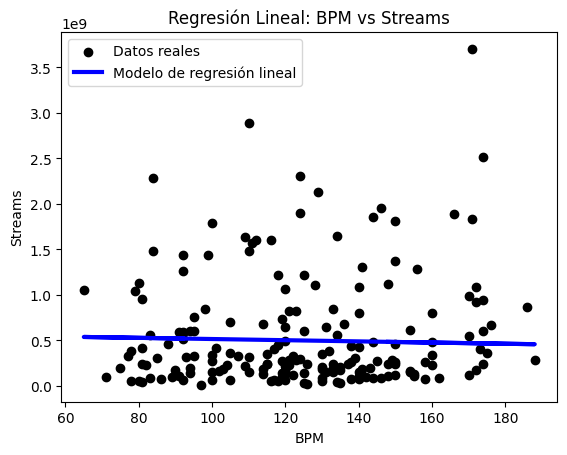

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_test, Y_test, color='black', label='Datos reales')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Modelo de regresión lineal')
plt.xlabel('BPM')
plt.ylabel('Streams')
plt.title('Regresión Lineal: BPM vs Streams')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

# Crear X con las variables predictoras y y con la variable dependiente
X = df_complete_data_base_cuartiles[['in_apple_charts', 'in_shazam_charts', 'in_deezer_charts']]
y = df_complete_data_base_cuartiles['in_spotify_charts']

# División de datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal múltiple
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
print('Coeficientes:', model.coef_)
print('Intercepto:', model.intercept_)
print('Error absoluto medio (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Error cuadrático medio (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Raíz cuadrada del error cuadrático medio (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Coeficiente de determinación (R^2):', metrics.r2_score(y_test, y_pred))

Coeficientes: [0.11063215 0.04461704 1.1405054 ]
Intercepto: 1.3486412463423765
Error absoluto medio (MAE): 7.673532655671667
Error cuadrático medio (MSE): 134.34472911387692
Raíz cuadrada del error cuadrático medio (RMSE): 11.590717368389107
Coeficiente de determinación (R^2): 0.5488329753442829


In [ ]:
df_complete_data_base_cuartiles.dropna(inplace=True)

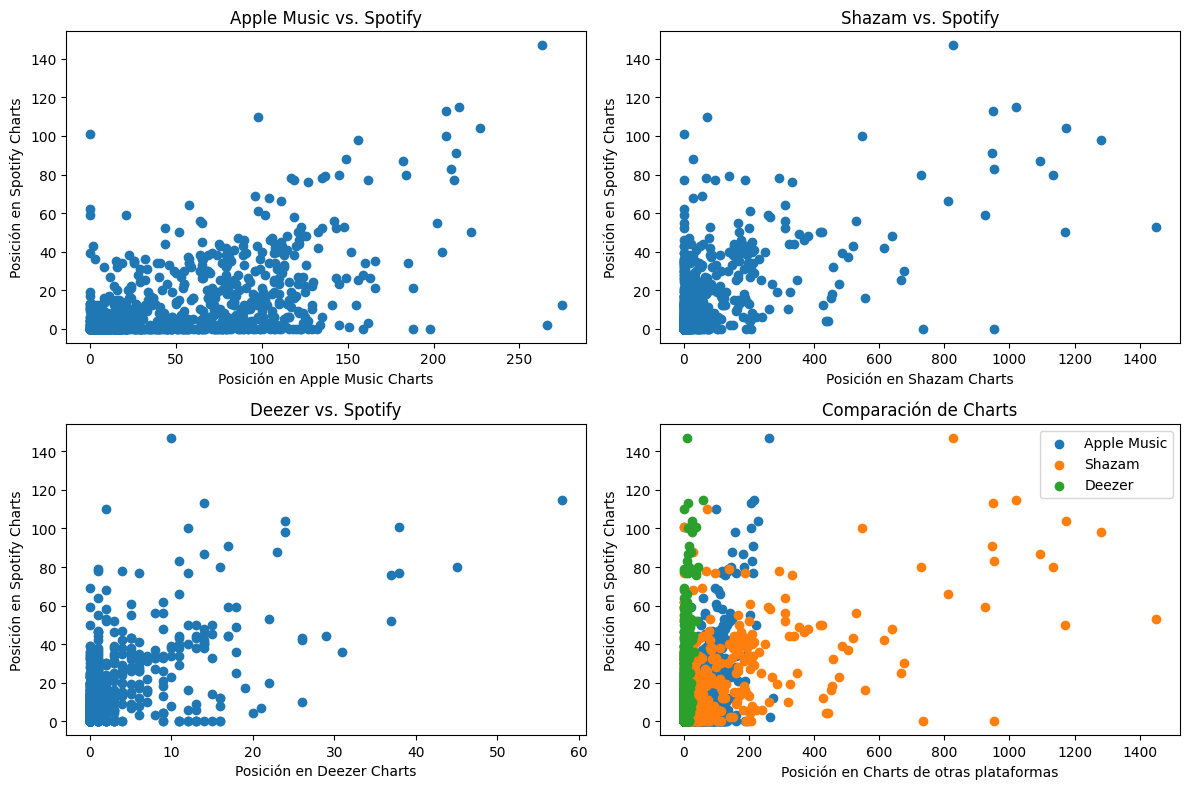

In [ ]:
import matplotlib.pyplot as plt

# Graficar la comparación de posiciones en Spotify con otras plataformas
plt.figure(figsize=(12, 8))

# Apple Music
plt.subplot(2, 2, 1)
plt.scatter(X['in_apple_charts'], y)
plt.title('Apple Music vs. Spotify')
plt.xlabel('Posición en Apple Music Charts')
plt.ylabel('Posición en Spotify Charts')

# Shazam
plt.subplot(2, 2, 2)
plt.scatter(X['in_shazam_charts'], y)
plt.title('Shazam vs. Spotify')
plt.xlabel('Posición en Shazam Charts')
plt.ylabel('Posición en Spotify Charts')

# Deezer
plt.subplot(2, 2, 3)
plt.scatter(X['in_deezer_charts'], y)
plt.title('Deezer vs. Spotify')
plt.xlabel('Posición en Deezer Charts')
plt.ylabel('Posición en Spotify Charts')

# Gráfico comparativo
plt.subplot(2, 2, 4)
plt.scatter(X['in_apple_charts'], y, label='Apple Music')
plt.scatter(X['in_shazam_charts'], y, label='Shazam')
plt.scatter(X['in_deezer_charts'], y, label='Deezer')
plt.title('Comparación de Charts')
plt.xlabel('Posición en Charts de otras plataformas')
plt.ylabel('Posición en Spotify Charts')
plt.legend()

plt.tight_layout()
plt.show()

Regresión Lineal Simple - Streams Clean:
Coeficiente: 47375.94577823659
Intercepto: 226276470.29089785
Error cuadrático medio (MSE): 9.207930144118795e+16
R^2: 0.5247320287028663


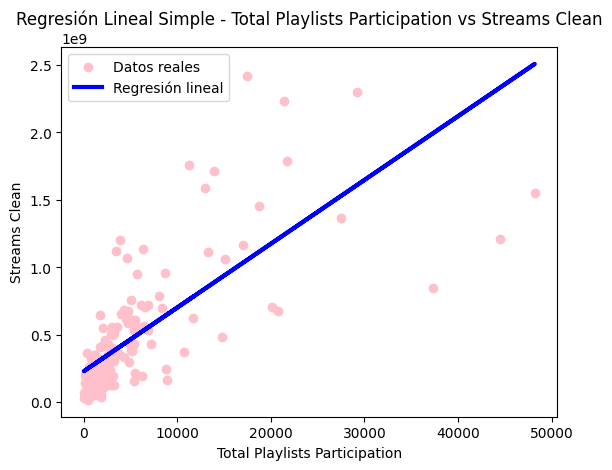

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Variables predictoras (X) y variable dependiente (y)
X_playlist = df_complete_data_base_cuartiles[['total_playlists_participation']]
y_streams_clean = df_complete_data_base_cuartiles['streams_clean']

# División de datos para entrenamiento y prueba
X_playlist_train, X_playlist_test, y_train, y_test = train_test_split(X_playlist, y_streams_clean, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model_streams_clean = LinearRegression()
model_streams_clean.fit(X_playlist_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_streams_clean = model_streams_clean.predict(X_playlist_test)

# Evaluar el rendimiento del modelo
print('Regresión Lineal Simple - Streams Clean:')
print('Coeficiente:', model_streams_clean.coef_[0])
print('Intercepto:', model_streams_clean.intercept_)
print('Error cuadrático medio (MSE):', metrics.mean_squared_error(y_test, y_pred_streams_clean))
print('R^2:', metrics.r2_score(y_test, y_pred_streams_clean))

# Graficar la regresión lineal
plt.scatter(X_playlist_test, y_test, color='pink', label='Datos reales')
plt.plot(X_playlist_test, y_pred_streams_clean, color='blue', linewidth=3, label='Regresión lineal')
plt.xlabel('Total Playlists Participation')
plt.ylabel('Streams Clean')
plt.title('Regresión Lineal Simple - Total Playlists Participation vs Streams Clean')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

# Crear X con las variables predictoras y y con la variable dependiente
X = df_complete_data_base_cuartiles[['danceability__', 'valence__', 'energy__', 'acousticness__', 'instrumentalness__', 'liveness__', 'speechiness__']]
y = df_complete_data_base_cuartiles['streams_clean']

# División de datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal múltiple
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
print('Coeficientes:', model.coef_)
print('Intercepto:', model.intercept_)
print('Error absoluto medio (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Error cuadrático medio (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Raíz cuadrada del error cuadrático medio (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Coeficiente de determinación (R^2):', metrics.r2_score(y_test, y_pred))

Coeficientes: [-3997145.08501656   566244.44765866 -2560129.46512946 -2012025.51321914
 -3725654.32812896 -2736879.99251957 -5113931.01928702]
Intercepto: 1048416132.9789219
Error absoluto medio (MAE): 330193261.88049847
Error cuadrático medio (MSE): 1.9815160361741037e+17
Raíz cuadrada del error cuadrático medio (RMSE): 445142228.5263558
Coeficiente de determinación (R^2): -0.022760915716449892


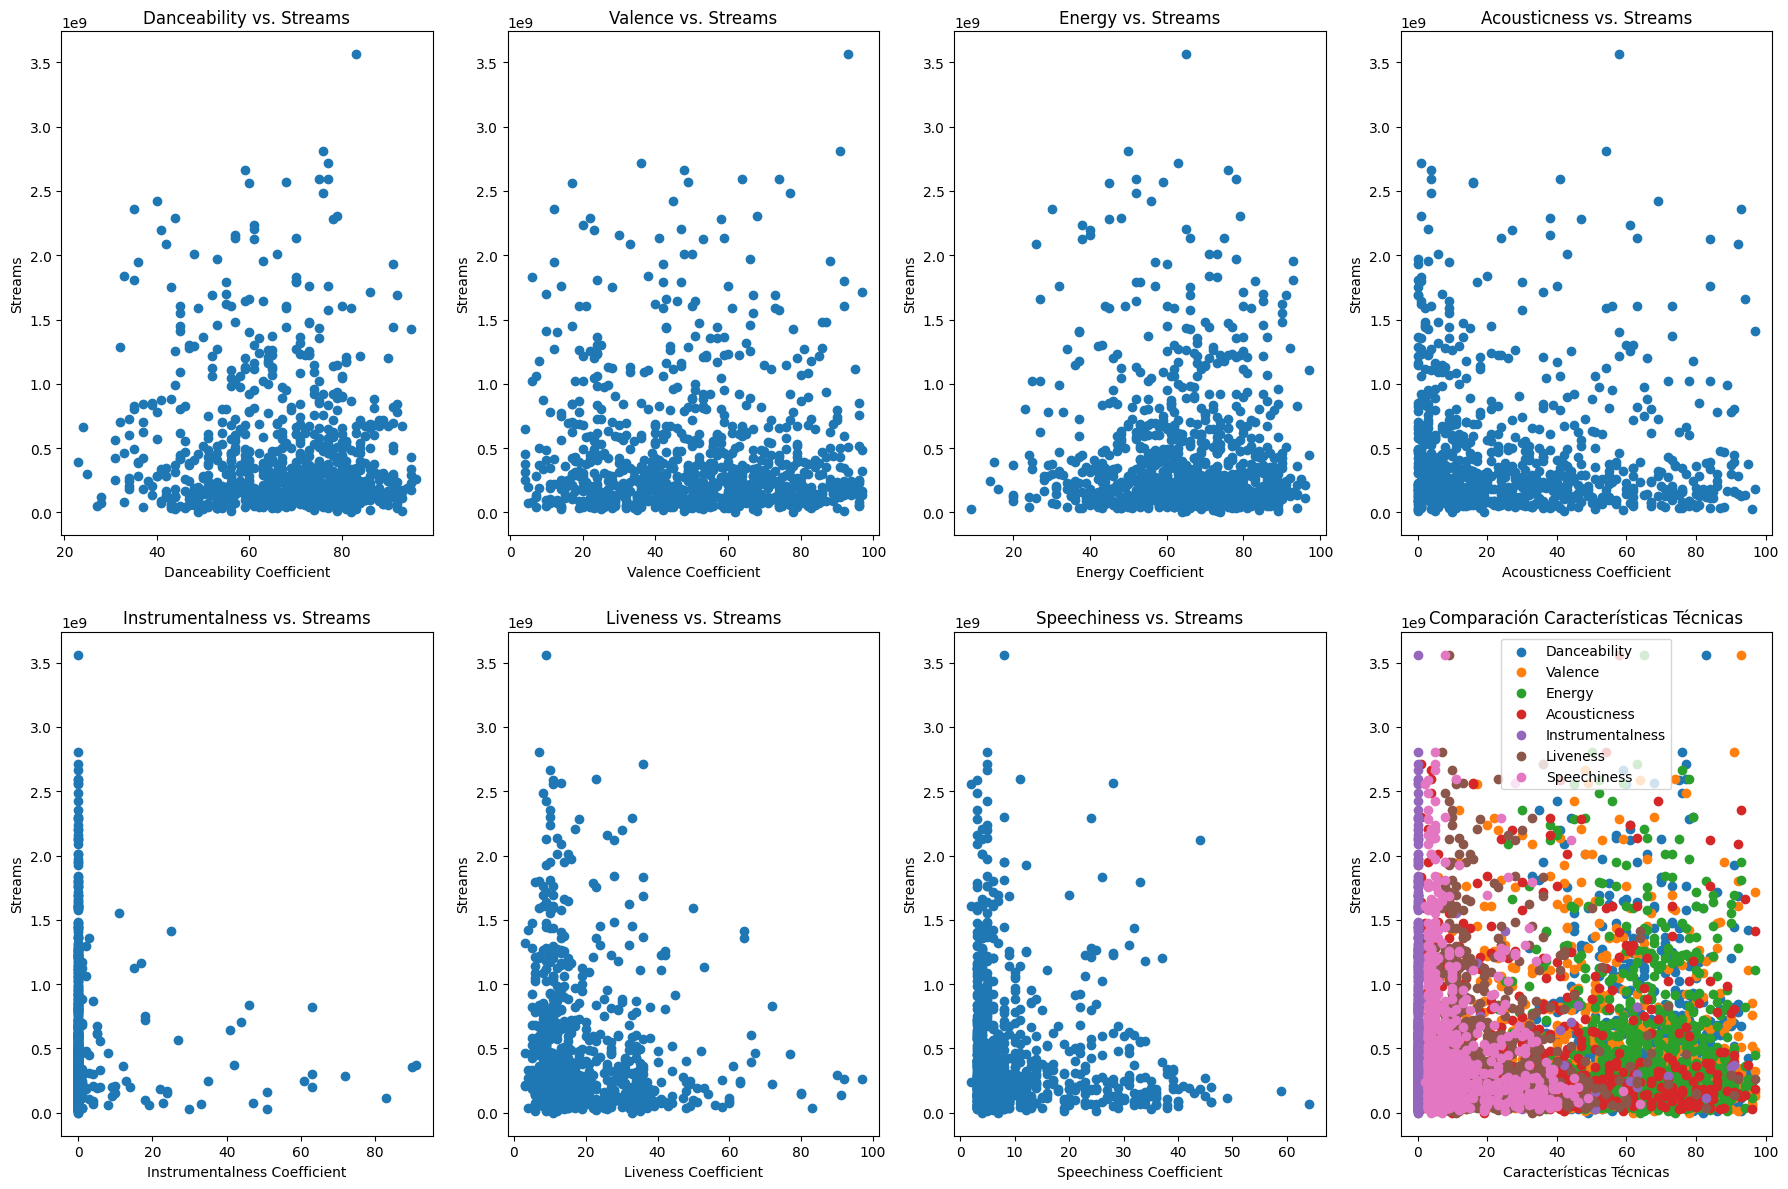

In [ ]:
import matplotlib.pyplot as plt

# Graficar la comparación de las características con relación a los streams
plt.figure(figsize=(18, 12))

# Danceability
plt.subplot(2, 4, 1)
plt.scatter(X['danceability__'], y)
plt.title('Danceability vs. Streams')
plt.xlabel('Danceability Coefficient')
plt.ylabel('Streams')

# Valence
plt.subplot(2, 4, 2)
plt.scatter(X['valence__'], y)
plt.title('Valence vs. Streams')
plt.xlabel('Valence Coefficient')
plt.ylabel('Streams')

# Energy
plt.subplot(2, 4, 3)
plt.scatter(X['energy__'], y)
plt.title('Energy vs. Streams')
plt.xlabel('Energy Coefficient')
plt.ylabel('Streams')

# Acousticness
plt.subplot(2, 4, 4)
plt.scatter(X['acousticness__'], y)
plt.title('Acousticness vs. Streams')
plt.xlabel('Acousticness Coefficient')
plt.ylabel('Streams')

# Instrumentalness
plt.subplot(2, 4, 5)
plt.scatter(X['instrumentalness__'], y)
plt.title('Instrumentalness vs. Streams')
plt.xlabel('Instrumentalness Coefficient')
plt.ylabel('Streams')

# Liveness
plt.subplot(2, 4, 6)
plt.scatter(X['liveness__'], y)
plt.title('Liveness vs. Streams')
plt.xlabel('Liveness Coefficient')
plt.ylabel('Streams')

# Speechiness
plt.subplot(2, 4, 7)
plt.scatter(X['speechiness__'], y)
plt.title('Speechiness vs. Streams')
plt.xlabel('Speechiness Coefficient')
plt.ylabel('Streams')

# Comparación de características
plt.subplot(2, 4, 8)
plt.scatter(X['danceability__'], y, label='Danceability')
plt.scatter(X['valence__'], y, label='Valence')
plt.scatter(X['energy__'], y, label='Energy')
plt.scatter(X['acousticness__'], y, label='Acousticness')
plt.scatter(X['instrumentalness__'], y, label='Instrumentalness')
plt.scatter(X['liveness__'], y, label='Liveness')
plt.scatter(X['speechiness__'], y, label='Speechiness')
plt.title('Comparación Características Técnicas')
plt.xlabel('Características Técnicas')
plt.ylabel('Streams')
plt.legend()

plt.tight_layout()
plt.show()

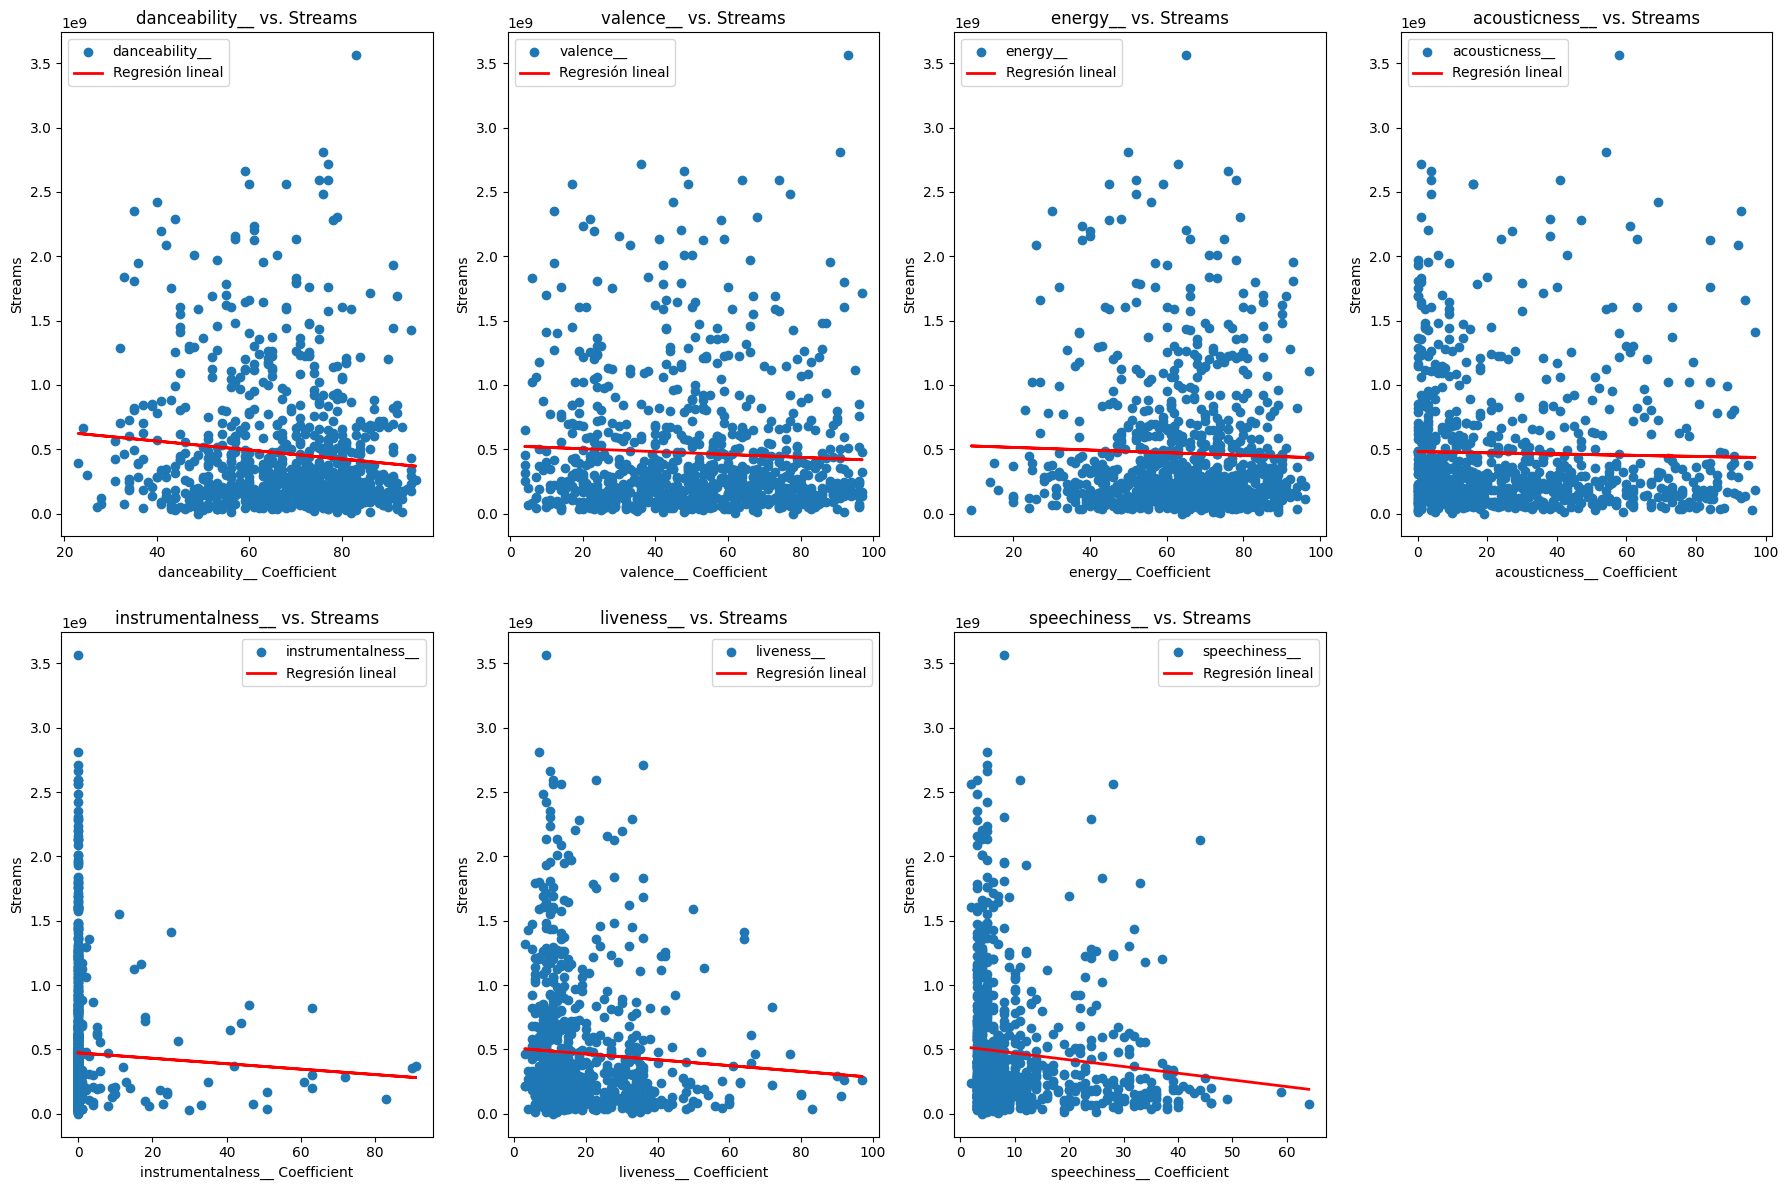

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Crear un modelo de regresión lineal
model = LinearRegression()

# Lista de características
features = ['danceability__', 'valence__', 'energy__', 'acousticness__', 'instrumentalness__', 'liveness__', 'speechiness__']

# Graficar la comparación de las características con relación a los streams
plt.figure(figsize=(18, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)
    plt.scatter(X[feature], y, label=f'{feature}')
    plt.title(f'{feature} vs. Streams')
    plt.xlabel(f'{feature} Coefficient')
    plt.ylabel('Streams')

    # Ajustar el modelo de regresión lineal
    X_feature = X[feature].values.reshape(-1, 1)
    model.fit(X_feature, y)
    y_pred = model.predict(X_feature)

    # Graficar la línea de regresión lineal
    plt.plot(X[feature], y_pred, color='red', linewidth=2, label='Regresión lineal')

    plt.legend()

plt.tight_layout()
plt.show()


Regresión Lineal Simple - total streams:
Coeficiente: 490622928.28175527
Intercepto: 119102610.79172242
Error cuadrático medio (MSE): 1.1810112597901258e+18
R^2: 0.3291597698250781


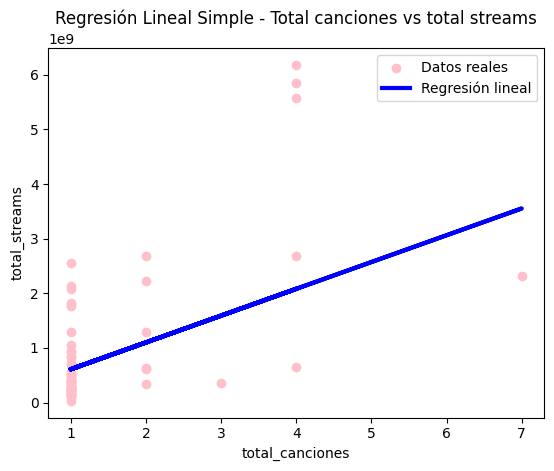

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Variables predictoras (X) y variable dependiente (y)
X_total_canciones = df_artist_song_counts_streams[['total_canciones']]
y_total_streams = df_artist_song_counts_streams['total_streams']

# División de datos para entrenamiento y prueba
X_canciones_train, X_canciones_test, y_train, y_test = train_test_split(X_total_canciones, y_total_streams, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model_total_streams = LinearRegression()
model_total_streams.fit(X_canciones_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_total_streams = model_total_streams.predict(X_canciones_test)

# Evaluar el rendimiento del modelo
print('Regresión Lineal Simple - total streams:')
print('Coeficiente:', model_total_streams.coef_[0])
print('Intercepto:', model_total_streams.intercept_)
print('Error cuadrático medio (MSE):', metrics.mean_squared_error(y_test, y_pred_total_streams))
print('R^2:', metrics.r2_score(y_test, y_pred_total_streams))

# Graficar la regresión lineal
plt.scatter(X_canciones_test, y_test, color='pink', label='Datos reales')
plt.plot(X_canciones_test, y_pred_total_streams, color='blue', linewidth=3, label='Regresión lineal')
plt.xlabel('total_canciones')
plt.ylabel('total_streams')
plt.title('Regresión Lineal Simple - Total canciones vs total streams')
plt.legend()
plt.show()

In [ ]:
X_canciones_train.dropna(inplace=True)
y_train.dropna(inplace=True)

In [ ]:
X_canciones_train = X_canciones_train.values.reshape(-1, 1)

In [ ]:
X_canciones_train = X_canciones_train.astype(float)
y_train = y_train.astype(float)

In [ ]:
X_canciones_train = df_artist_song_counts_streams[['total_canciones']].values.reshape(-1, 1)
y_train = df_artist_song_counts_streams['total_streams'].values

In [ ]:
df_artist_song_counts_streams.dropna(subset=['total_canciones', 'total_streams'], inplace=True)

X_canciones_train = df_artist_song_counts_streams[['total_canciones']].values.reshape(-1, 1)
y_train = df_artist_song_counts_streams['total_streams'].values


Regresión Lineal Simple - total streams:
Coeficiente: 1.372667455987561e-09
Intercepto: 0.504616408385762
Error cuadrático medio (MSE): 2.2063595386009243
R^2: -0.7196134096045306


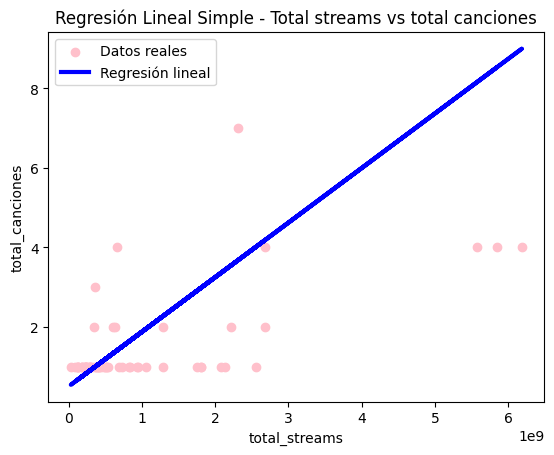

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Variables predictoras (X) y variable dependiente (y)
X_total_canciones = df_artist_song_counts_streams[['total_canciones']]
y_total_streams = df_artist_song_counts_streams['total_streams']

# División de datos para entrenamiento y prueba
X_canciones_train, X_canciones_test, y_train, y_test = train_test_split(X_total_canciones, y_total_streams, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model_total_streams = LinearRegression()
model_total_streams.fit(y_train.values.reshape(-1, 1), X_canciones_train.values)

# Realizar predicciones en el conjunto de prueba
y_pred_total_streams = model_total_streams.predict(y_test.values.reshape(-1, 1))

# Evaluar el rendimiento del modelo
print('Regresión Lineal Simple - total streams:')
print('Coeficiente:', model_total_streams.coef_[0][0])
print('Intercepto:', model_total_streams.intercept_[0])
print('Error cuadrático medio (MSE):', metrics.mean_squared_error(X_canciones_test, y_pred_total_streams))
print('R^2:', metrics.r2_score(X_canciones_test, y_pred_total_streams))

# Graficar la regresión lineal
plt.scatter(y_test, X_canciones_test, color='pink', label='Datos reales')
plt.plot(y_test, y_pred_total_streams, color='blue', linewidth=3, label='Regresión lineal')
plt.xlabel('total_streams')
plt.ylabel('total_canciones')
plt.title('Regresión Lineal Simple - Total streams vs total canciones')
plt.legend()
plt.show()
